In [1]:
from scipy import io
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

X = io.loadmat(os.path.join('VORTALL.mat'))['VORTALL']

In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd

def split_data(training_size, data):
    X_train = np.empty((data.shape[0], training_size))
    y_train = np.empty((data.shape[0], training_size))
    X_test = np.empty((data.shape[0], 150 - training_size))
    y_test = np.empty((data.shape[0], 150 - training_size))

    for i in range(training_size):
        X_train[:, i] = data[:, i]
        y_train[:, i] = data[:, i + 1]

    for i in range(0, 150 - training_size):
        X_test[:, i] = data[:, training_size + i]
        y_test[:, i] = data[:, training_size + i + 1]

    return X_train.T, X_test.T, y_train.T, y_test.T

def train_feedforward_neural_network(training_size, data):
    X_train, X_test, y_train, y_test = split_data(training_size, data)

    model = keras.models.Sequential([
        keras.layers.Dense(1000, input_dim=X.shape[0], activation="relu"),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(250, activation="relu"),
        keras.layers.Dense(125, activation="relu"),
        keras.layers.Dense(X.shape[0], activation="linear")
    ])

    model.compile(loss="mse", optimizer="adam")

    return model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

def get_loss(percent, data, limit):
    pd.DataFrame(train_feedforward_neural_network(int(150 * percent / 100), data).history).plot(figsize=(8, 5))
    plt.title("Feedforward Neural Network Trained With " + str(percent) + "% of Data")
    plt.grid(True)
    if limit:
        plt.gca().set_ylim(0, 1)

Epoch 1/100
3/3 [==============================] - 4s 967ms/step - loss: 1.1950 - val_loss: 0.9776
Epoch 2/100
3/3 [==============================] - 2s 657ms/step - loss: 0.8741 - val_loss: 0.5922
Epoch 3/100
3/3 [==============================] - 2s 662ms/step - loss: 0.5130 - val_loss: 0.3283
Epoch 4/100
3/3 [==============================] - 2s 605ms/step - loss: 0.2974 - val_loss: 0.2346
Epoch 5/100
3/3 [==============================] - 2s 744ms/step - loss: 0.2089 - val_loss: 0.1656
Epoch 6/100
3/3 [==============================] - 2s 591ms/step - loss: 0.1457 - val_loss: 0.1092
Epoch 7/100
3/3 [==============================] - 2s 574ms/step - loss: 0.1031 - val_loss: 0.0821
Epoch 8/100
3/3 [==============================] - 2s 578ms/step - loss: 0.0753 - val_loss: 0.0600
Epoch 9/100
3/3 [==============================] - 2s 618ms/step - loss: 0.0558 - val_loss: 0.0467
Epoch 10/100
3/3 [==============================] - 2s 594ms/step - loss: 0.0436 - val_loss: 0.0400
Epoch 11/

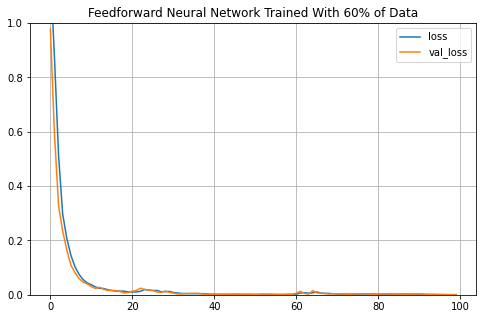

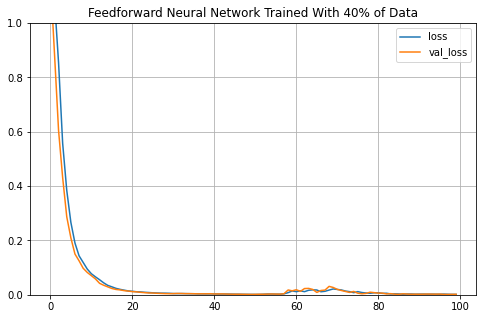

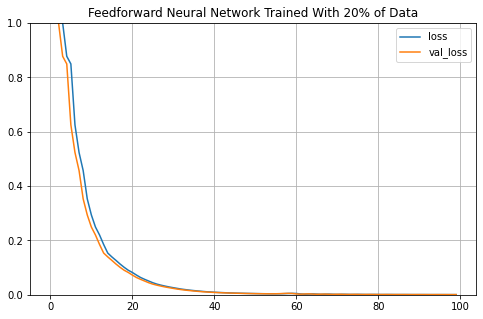

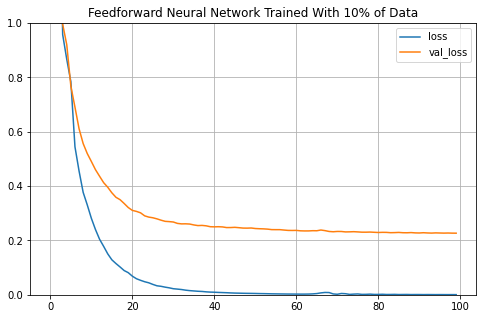

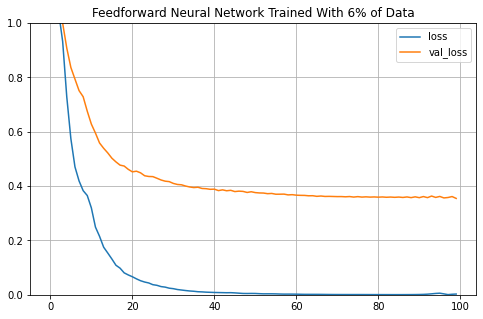

In [3]:
for P in (60, 40, 20, 10, 6):
    get_loss(P, X, True)

So as we decrease the training data from 60-20%, the loss stays relative similar. As we decrease the training data from 20% -> 10% -> 6% we see a more dramatic increase in loss.

Epoch 1/100
3/3 [==============================] - 3s 871ms/step - loss: 1.1196e-05 - val_loss: 1.1196e-05
Epoch 2/100
3/3 [==============================] - 2s 762ms/step - loss: 1.1186e-05 - val_loss: 1.1195e-05
Epoch 3/100
3/3 [==============================] - 2s 681ms/step - loss: 1.1174e-05 - val_loss: 1.1195e-05
Epoch 4/100
3/3 [==============================] - 2s 642ms/step - loss: 1.1161e-05 - val_loss: 1.1197e-05
Epoch 5/100
3/3 [==============================] - 2s 709ms/step - loss: 1.1148e-05 - val_loss: 1.1200e-05
Epoch 6/100
3/3 [==============================] - 2s 759ms/step - loss: 1.1135e-05 - val_loss: 1.1205e-05
Epoch 7/100
3/3 [==============================] - 2s 646ms/step - loss: 1.1124e-05 - val_loss: 1.1211e-05
Epoch 8/100
3/3 [==============================] - 2s 660ms/step - loss: 1.1113e-05 - val_loss: 1.1218e-05
Epoch 9/100
3/3 [==============================] - 2s 669ms/step - loss: 1.1104e-05 - val_loss: 1.1226e-05
Epoch 10/100
3/3 [===================

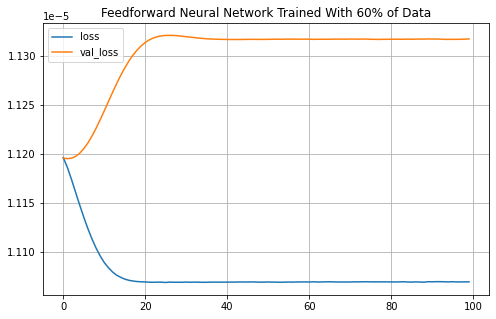

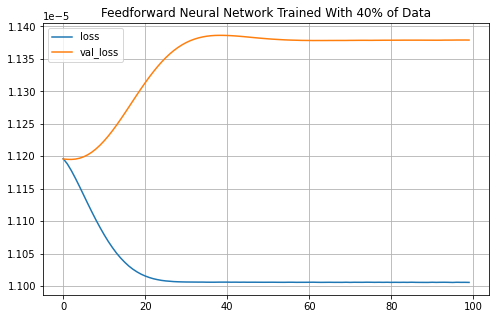

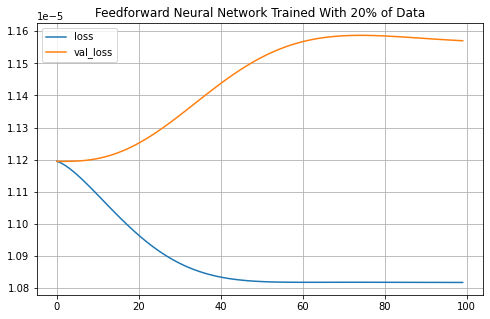

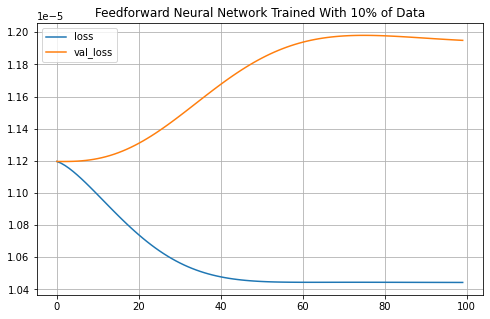

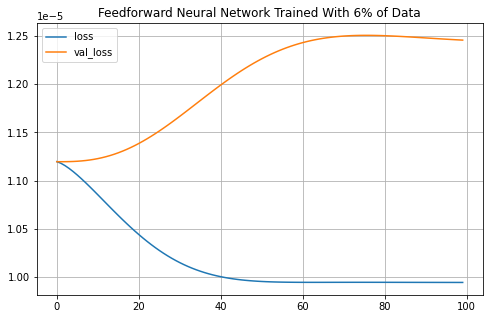

In [4]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

for P in (60, 40, 20, 10, 6):
    get_loss(P, U, False)

We see that the val_loss in each example increases at first before stabilizing, and the loss follows the same general pattern at with X matrix, except our initial loss is magnitudes lower.